In [2]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(rlang))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggpubr))
# source('/home/workspace/pbmc_flow/utils.R')

### Sample Availability by Subject and Timepoint

   Subject num_timepoints
1   FH1002              8
2   FH1003              8
3   FH1004              7
4   FH1005              8
5   FH1006              5
6   FH1007              4
7   FH1008              6
8   FH1009              8
9   FH1011              5
10  FH1012              8
11  FH1014              3
12  FH1016              2
13  FH1017              6


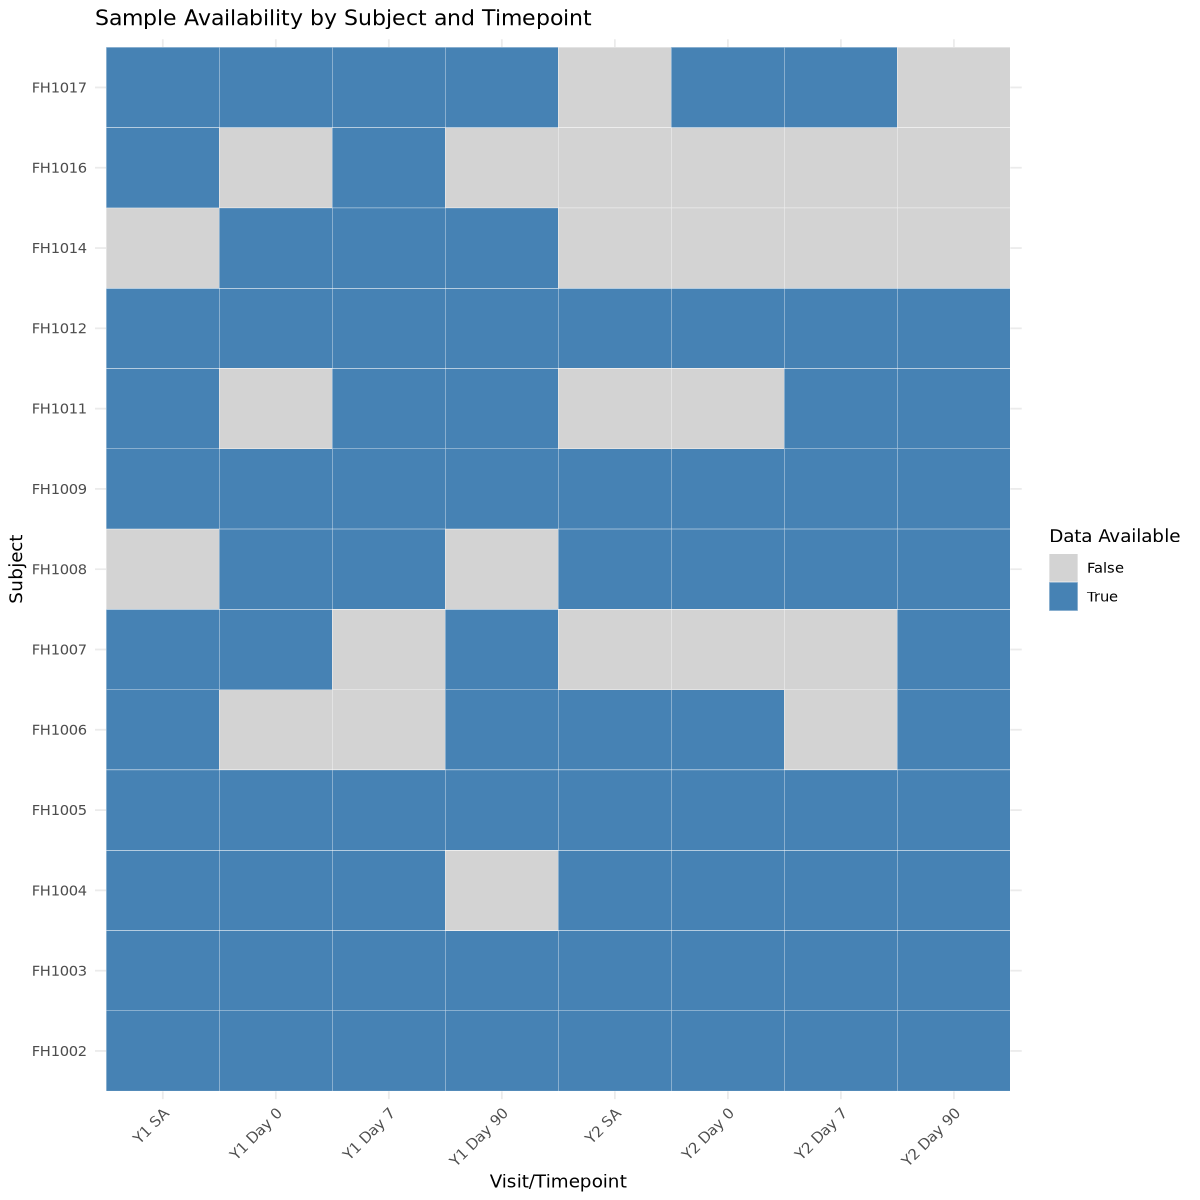

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10)

home <- "/home/workspace/"
path <- "pbmc_flow/data/T Cell PBMC data_final_counts, % viable cells(in).csv"

data <- read.csv(file.path(home, path))

timepoints_per_subject <- aggregate(Visit ~ Subject, data, function(x) length(unique(x)))
names(timepoints_per_subject)[2] <- "num_timepoints"

print(timepoints_per_subject)

timepoint_data <- unique(data[c("Subject", "Visit")])
timepoint_data$present <- 1

all_subjects <- unique(timepoint_data$Subject)
all_visits <- unique(timepoint_data$Visit)

complete_grid <- expand.grid(Subject = all_subjects, Visit = all_visits)
plot_data <- merge(complete_grid, timepoint_data, all.x = TRUE)
plot_data$present[is.na(plot_data$present)] <- 0

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

plot_data$Visit <- factor(plot_data$Visit, levels = names(timepoint_labels), labels = timepoint_labels)
plot_data$Subject <- factor(plot_data$Subject, levels = c("FH1002", "FH1003", "FH1004", "FH1005", "FH1006", "FH1007", "FH1008", "FH1009", "FH1011", "FH1012", "FH1014", "FH1016", "FH1017"))

ggplot(plot_data, aes(x = Visit, y = Subject, fill = factor(present))) +
  geom_tile(color = "white") +
  scale_fill_manual(values = c("0" = "lightgray", "1" = "steelblue"), 
                    labels = c("0" = "False", "1" = "True"),
                    name = "Data Available") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Sample Availability by Subject and Timepoint",
       x = "Visit/Timepoint", y = "Subject")

### All Subject-Visit-Celltype combinations with duplicates

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)

home <- "/home/workspace/"
path <- "pbmc_flow/data/T Cell PBMC data_final_counts, % viable cells(in).csv"

# Use fread to get data.table or convert to data.table
df <- fread(file.path(home, path))

# Filter for viable cells and define columns
df <- df[df$percentOf == 'Viable Cells',]
df$subject <- df$Subject
df$visit <- df$Visit  
df$Cell <- df$population

# Show only combinations with duplicates
duplicates_only <- duplicate_counts[N > 1]
setorder(duplicates_only, -N)  # Sort by highest duplicates first

print("All Subject-Visit-Celltype combinations with duplicates:")
print(duplicates_only)

[1] "All Subject-Visit-Celltype combinations with duplicates:"
    subject                  visit          Cell     N
     <char>                 <char>        <char> <int>
 1:  FH1008 Flu Year 2 Stand-Alone Total T cells     2
 2:  FH1008 Flu Year 2 Stand-Alone        TCR yd     2
 3:  FH1008 Flu Year 2 Stand-Alone         TCRab     2
 4:  FH1008 Flu Year 2 Stand-Alone        CD4 rm     2
 5:  FH1008 Flu Year 2 Stand-Alone  CD4+ T cells     2
 6:  FH1008 Flu Year 2 Stand-Alone        CM CD4     2
 7:  FH1008 Flu Year 2 Stand-Alone     TFH cells     2
 8:  FH1008 Flu Year 2 Stand-Alone        EM CD4     2
 9:  FH1008 Flu Year 2 Stand-Alone     Naive CD4     2
10:  FH1008 Flu Year 2 Stand-Alone     TEMRA CD4     2
11:  FH1008 Flu Year 2 Stand-Alone          Treg     2
12:  FH1008 Flu Year 2 Stand-Alone   Memory Treg     2
13:  FH1008 Flu Year 2 Stand-Alone    Naive Treg     2
14:  FH1008 Flu Year 2 Stand-Alone        CD8 rm     2
15:  FH1008 Flu Year 2 Stand-Alone  CD8+ T cells     2
16

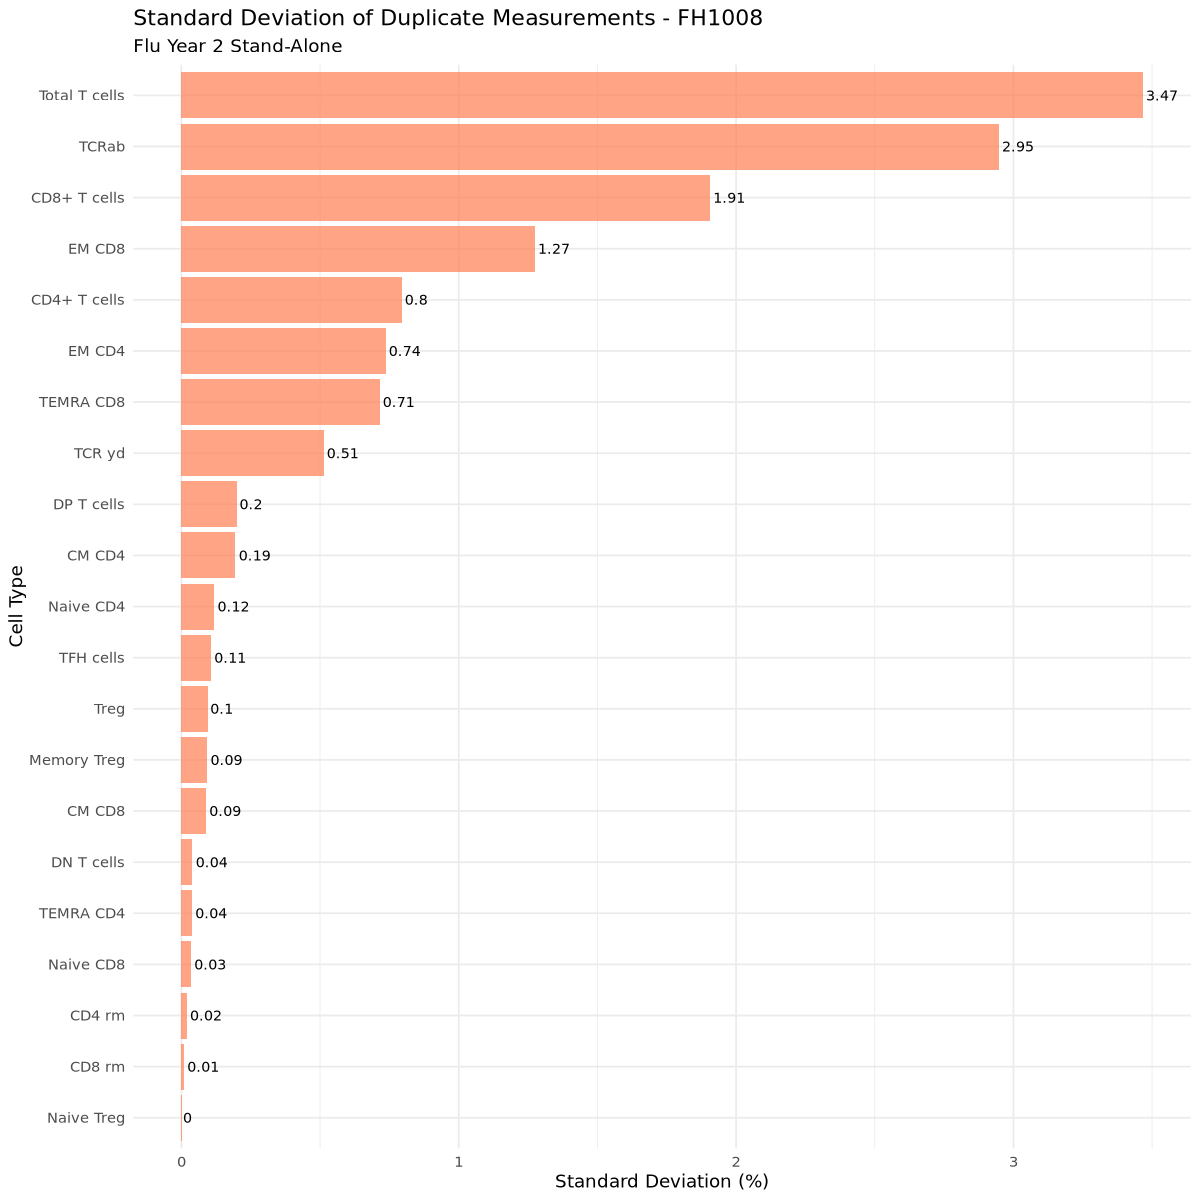

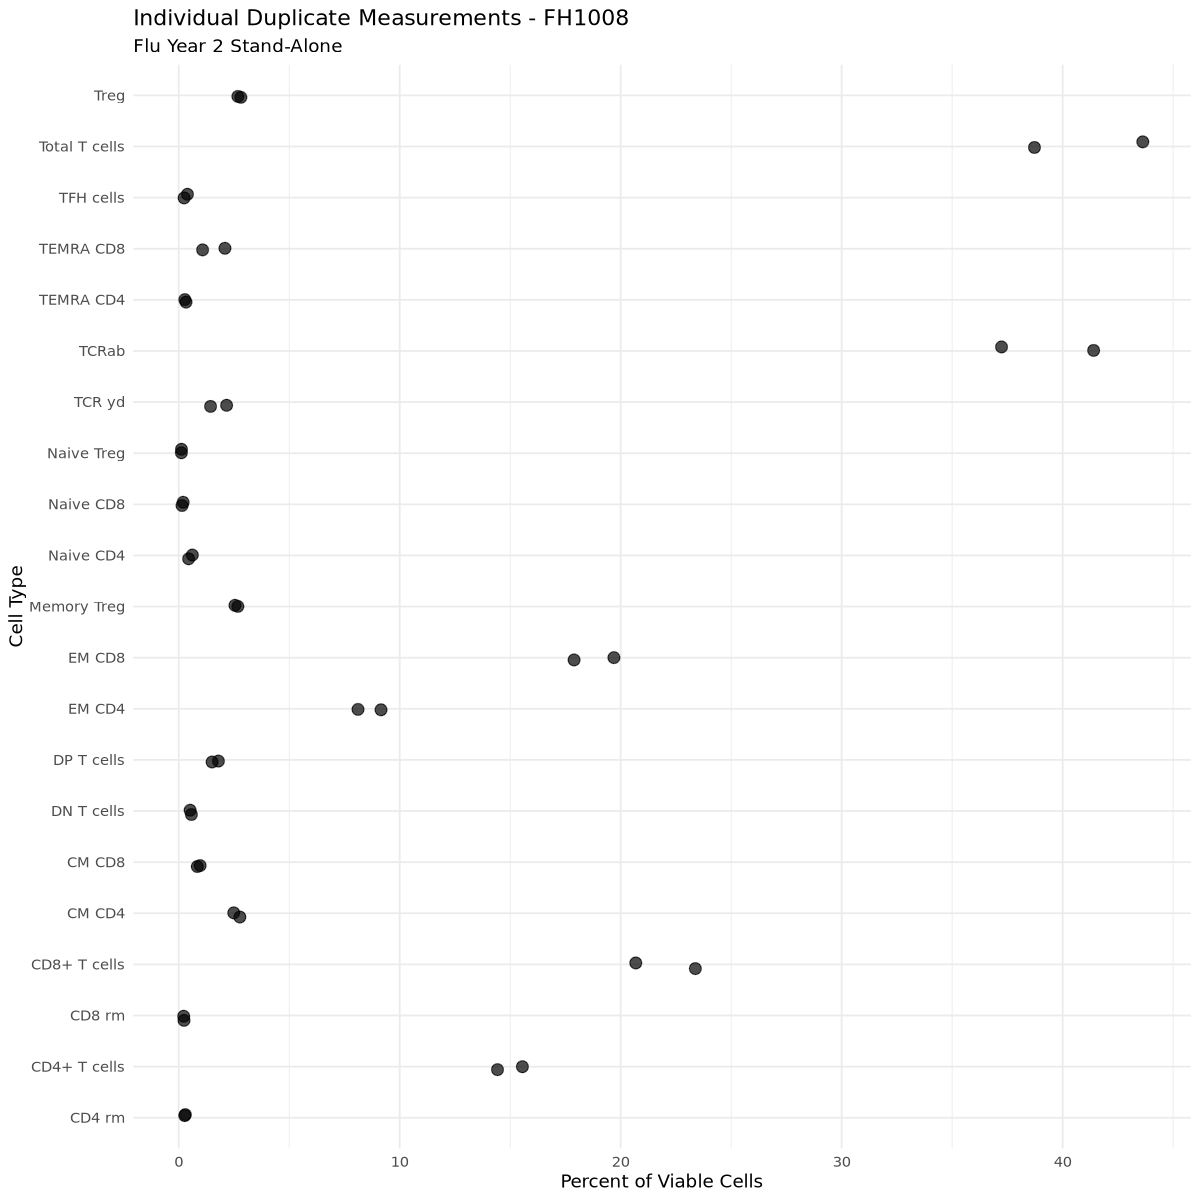

[1] "Duplicate measurement statistics:"
             Cell mean_percent  sd_percent min_percent max_percent diff_percent
           <char>        <num>       <num>       <num>       <num>        <num>
 1: Total T cells   41.1760747 3.466449934  38.7249244  43.6272249  4.902300510
 2:        TCR yd    1.8041287 0.512945237   1.4414216   2.1668357  0.725414111
 3:         TCRab   39.3187599 2.947204702  37.2347715  41.4027483  4.167976860
 4:        CD4 rm    0.2857073 0.019293204   0.2720649   0.2993496  0.027284711
 5:  CD4+ T cells   14.9890025 0.796807059  14.4255748  15.5524301  1.126855350
 6:        CM CD4    2.6288511 0.194939527   2.4910080   2.7666941  0.275686123
 7:     TFH cells    0.3197877 0.106629122   0.2443895   0.3951858  0.150796350
 8:        EM CD4    8.6337555 0.736151316   8.1132179   9.1542931  1.041075175
 9:     Naive CD4    0.5326840 0.118571578   0.4488413   0.6165268  0.167685534
10:     TEMRA CD4    0.3026197 0.038305551   0.2755336   0.3297058  0.054172230


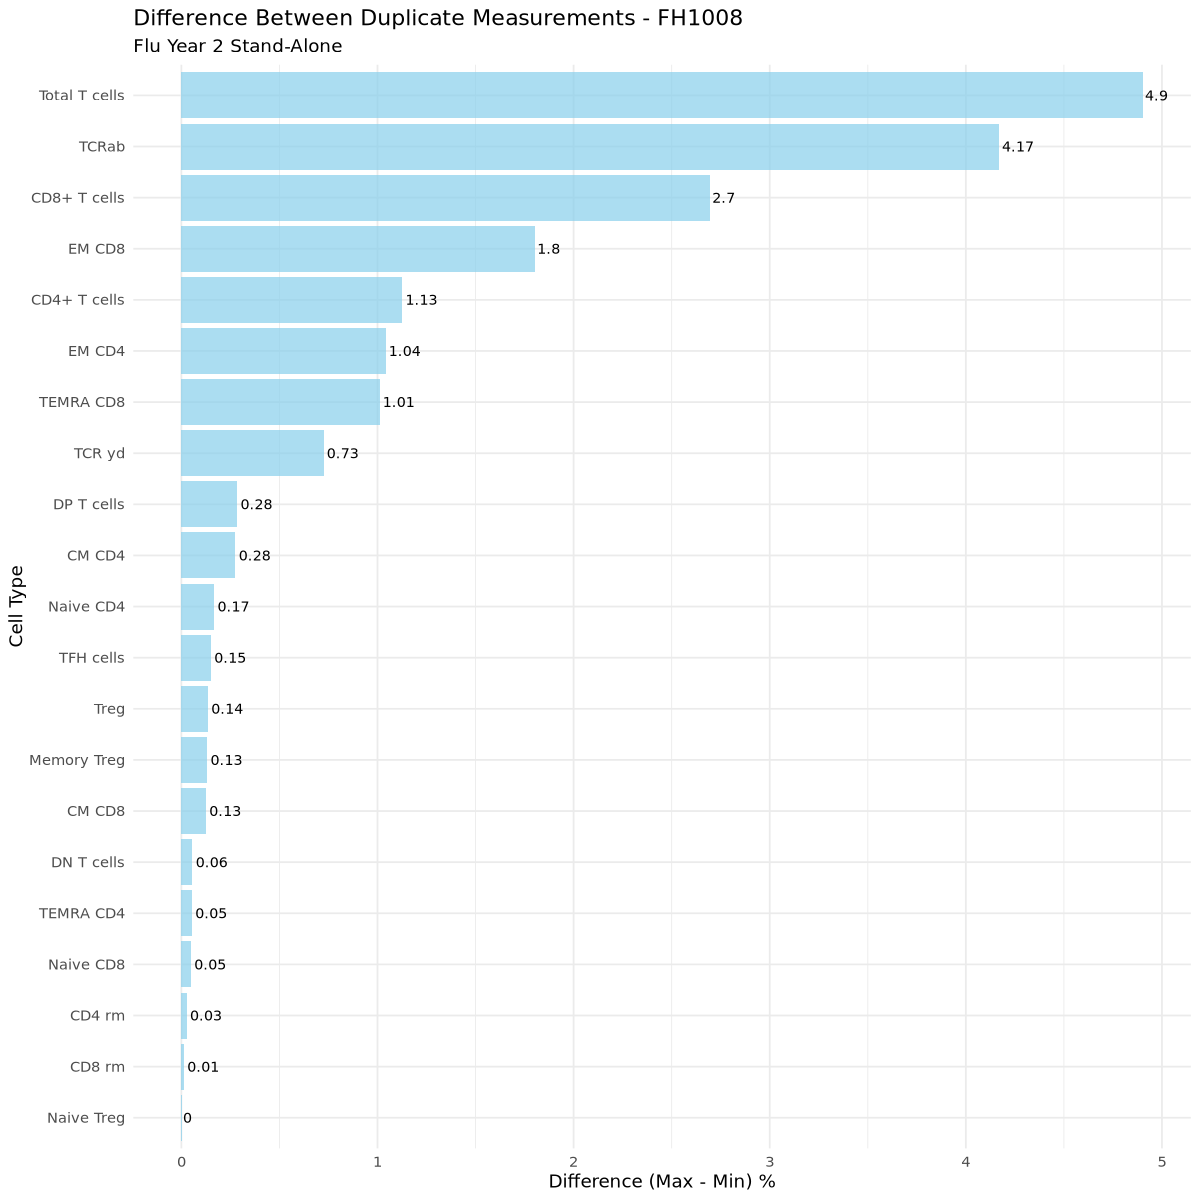

In [12]:
# Filter to only FH1008 Flu Year 2 Stand-Alone duplicates
fh1008_duplicates <- df[subject == "FH1008" & visit == "Flu Year 2 Stand-Alone"]

# Calculate SD and mean for each cell type
duplicate_stats <- fh1008_duplicates[, .(
  mean_percent = mean(percent),
  sd_percent = sd(percent),
  min_percent = min(percent),
  max_percent = max(percent),
  diff_percent = max(percent) - min(percent)
), by = Cell]

# Plot 1: Standard deviation by cell type
p1 <- ggplot(duplicate_stats, aes(x = reorder(Cell, sd_percent), y = sd_percent)) +
  geom_col(fill = "coral", alpha = 0.7) +
  geom_text(aes(label = round(sd_percent, 2)), hjust = -0.1, size = 3) +
  coord_flip() +
  labs(title = "Standard Deviation of Duplicate Measurements - FH1008",
       subtitle = "Flu Year 2 Stand-Alone",
       x = "Cell Type",
       y = "Standard Deviation (%)") +
  theme_minimal()

# Plot 2: Show both values for each cell type (FIXED)
fh1008_long <- fh1008_duplicates[, .(
  cell_type = Cell,
  percentage = percent
)]

p2 <- ggplot(fh1008_long, aes(x = cell_type, y = percentage)) +
  geom_point(size = 3, alpha = 0.7, position = position_jitter(width = 0.1)) +
  coord_flip() +
  labs(title = "Individual Duplicate Measurements - FH1008",
       subtitle = "Flu Year 2 Stand-Alone", 
       x = "Cell Type",
       y = "Percent of Viable Cells") +
  theme_minimal()

# Plot 3: Difference between duplicates
p3 <- ggplot(duplicate_stats, aes(x = reorder(Cell, diff_percent), y = diff_percent)) +
  geom_col(fill = "skyblue", alpha = 0.7) +
  geom_text(aes(label = round(diff_percent, 2)), hjust = -0.1, size = 3) +
  coord_flip() +
  labs(title = "Difference Between Duplicate Measurements - FH1008",
       subtitle = "Flu Year 2 Stand-Alone",
       x = "Cell Type", 
       y = "Difference (Max - Min) %") +
  theme_minimal()

print(p1)
print(p2) 
print(p3)

# Show the actual duplicate values
print("Duplicate measurement statistics:")
print(duplicate_stats)

# Show the raw duplicate data
print("Raw duplicate measurements:")
print(fh1008_duplicates[, .(Cell, percent)])

### Function for testing celltype between timepoints

In [41]:
theme_clr_by_timepoint <- function(base_size = 14,
                                   tp_color_map = c(
                                     "Y1 SA" = "#babaa6",
                                     "Y1 Day 0" = "#bfa600", 
                                     "Y1 Day 7" = "#a94b23",
                                     "Y1 Day 90" = "#a0204f",
                                     "Y2 SA" = "#f4f4c3",
                                     "Y2 Day 0" = "#ffec6e",
                                     "Y2 Day 7" = "#f6a27e",
                                     "Y2 Day 90" = "#f679a7"
                                   ),
                                   color_map = c(
                                     "FH1002" = "#ff7f0e", "FH1003" = "#279e68",
                                     "FH1004" = "#d62728", "FH1005" = "#aa40fc", "FH1006" = "#8c564b",
                                     "FH1007" = "#e377c2", "FH1008" = "#b5bd61", "FH1009" = "#17becf",
                                     "FH1011" = "#ffbb78", "FH1012" = "#98df8a",
                                     "FH1014" = "#ff9896", "FH1016" = "#c5b0d5", "FH1017" = "#c49c94"
                                   )) {
  list(
    theme_bw(base_size = base_size) +
      theme(
        plot.title = element_text(hjust = 0.5, face = "bold", size = base_size + 4),
        axis.title = element_text(size = base_size, face = "bold"),
        axis.text = element_text(size = base_size - 2),
        axis.text.x = element_text(angle = 90, hjust = 1),
        legend.position = "none"
      ),
    scale_fill_manual(values = tp_color_map),
    scale_color_manual(values = color_map)
  )
}

testCelltype_paired <- function(Mat, celltype, pairsOfTimes, size=5) {
  cMat = Mat[Cell==celltype & visit %in% unique(unlist(pairsOfTimes))]
  
  cMat$Value = cMat$cell_type_frac_total
  
  # Get all consecutive time point pairs
  time_points <- levels(cMat$visit)
  
  pairsOfTimes = pairsOfTimes
  
  # Identify subjects with paired data for plotting
  subjects_with_pairs <- c()
  
  # Loop through consecutive time points
  pairwise_results <- data.frame(
    Time1 = character(),
    Time2 = character(),
    p_value = numeric(),
    stringsAsFactors = FALSE
  )
  for (i in 1:length(pairsOfTimes)) {
    # Subset data for the two consecutive time points
    pairwise_data <- subset(cMat, visit %in% pairsOfTimes[[i]])
    pairwise_data = dcast(pairwise_data, subject ~ visit, value.var = 'Value')
    pairwise_data = pairwise_data[ !is.na(pairwise_data[,2][[1]]) & 
                                     !is.na(pairwise_data[,3][[1]])]   
    
    subjects_with_pairs <- c(subjects_with_pairs, pairwise_data$subject)
    
    # Perform a paired t-test
    test_result <- wilcox.test(
      pairwise_data[,2][[1]], 
      pairwise_data[,3][[1]],
      paired = TRUE
    )
    
    medDiff = median( pairwise_data[,2][[1]]-pairwise_data[,3][[1]])
    # Store the results
    pval =test_result$p.value
    pairwise_results <- rbind(pairwise_results, data.frame(
      Time1 = pairsOfTimes[[i]][1],
      Time2 = pairsOfTimes[[i]][2],
      pval = pval,
      p_value = ifelse(pval < 0.05,'p<0.05', ''),
      p_value2 = ifelse(pval < 0.05,'*',''),
      Time1Val = median(pairwise_data[,2][[1]]),
      Time2Val = median(pairwise_data[,3][[1]]),
      Log2FC = log2(median(pairwise_data[,3][[1]]) /median(pairwise_data[,2][[1]]))
    ))
  }
  
  # Filter cMat to only subjects with paired data
  cMat_plot <- cMat[subject %in% unique(subjects_with_pairs)]
  
    p <- ggplot(cMat_plot, aes(x = visit, y = Value, fill = visit)) +
      geom_boxplot(color = "black") +
      geom_point(aes(color = subject), alpha = 0.3) +
      geom_line(aes(group = subject, color = subject), alpha = 0.3) +
      theme_clr_by_timepoint() +
      labs(title = celltype, x = "", y = "") +
      ylim(NA, max(cMat_plot$Value) + 0.7)
  
  for (i in 1:nrow(pairwise_results)) {
    p <- p + annotate(
      "text",
      x = i + 0.5,
      y = max(cMat_plot$Value) + 0.5,
      label = pairwise_results$p_value[i],
      size =size ,
      color = "red"
    )
  }
  pairwise_results$Celltype=celltype
  return(list(Res=pairwise_results,
              Plot =p))
}

### Year 1

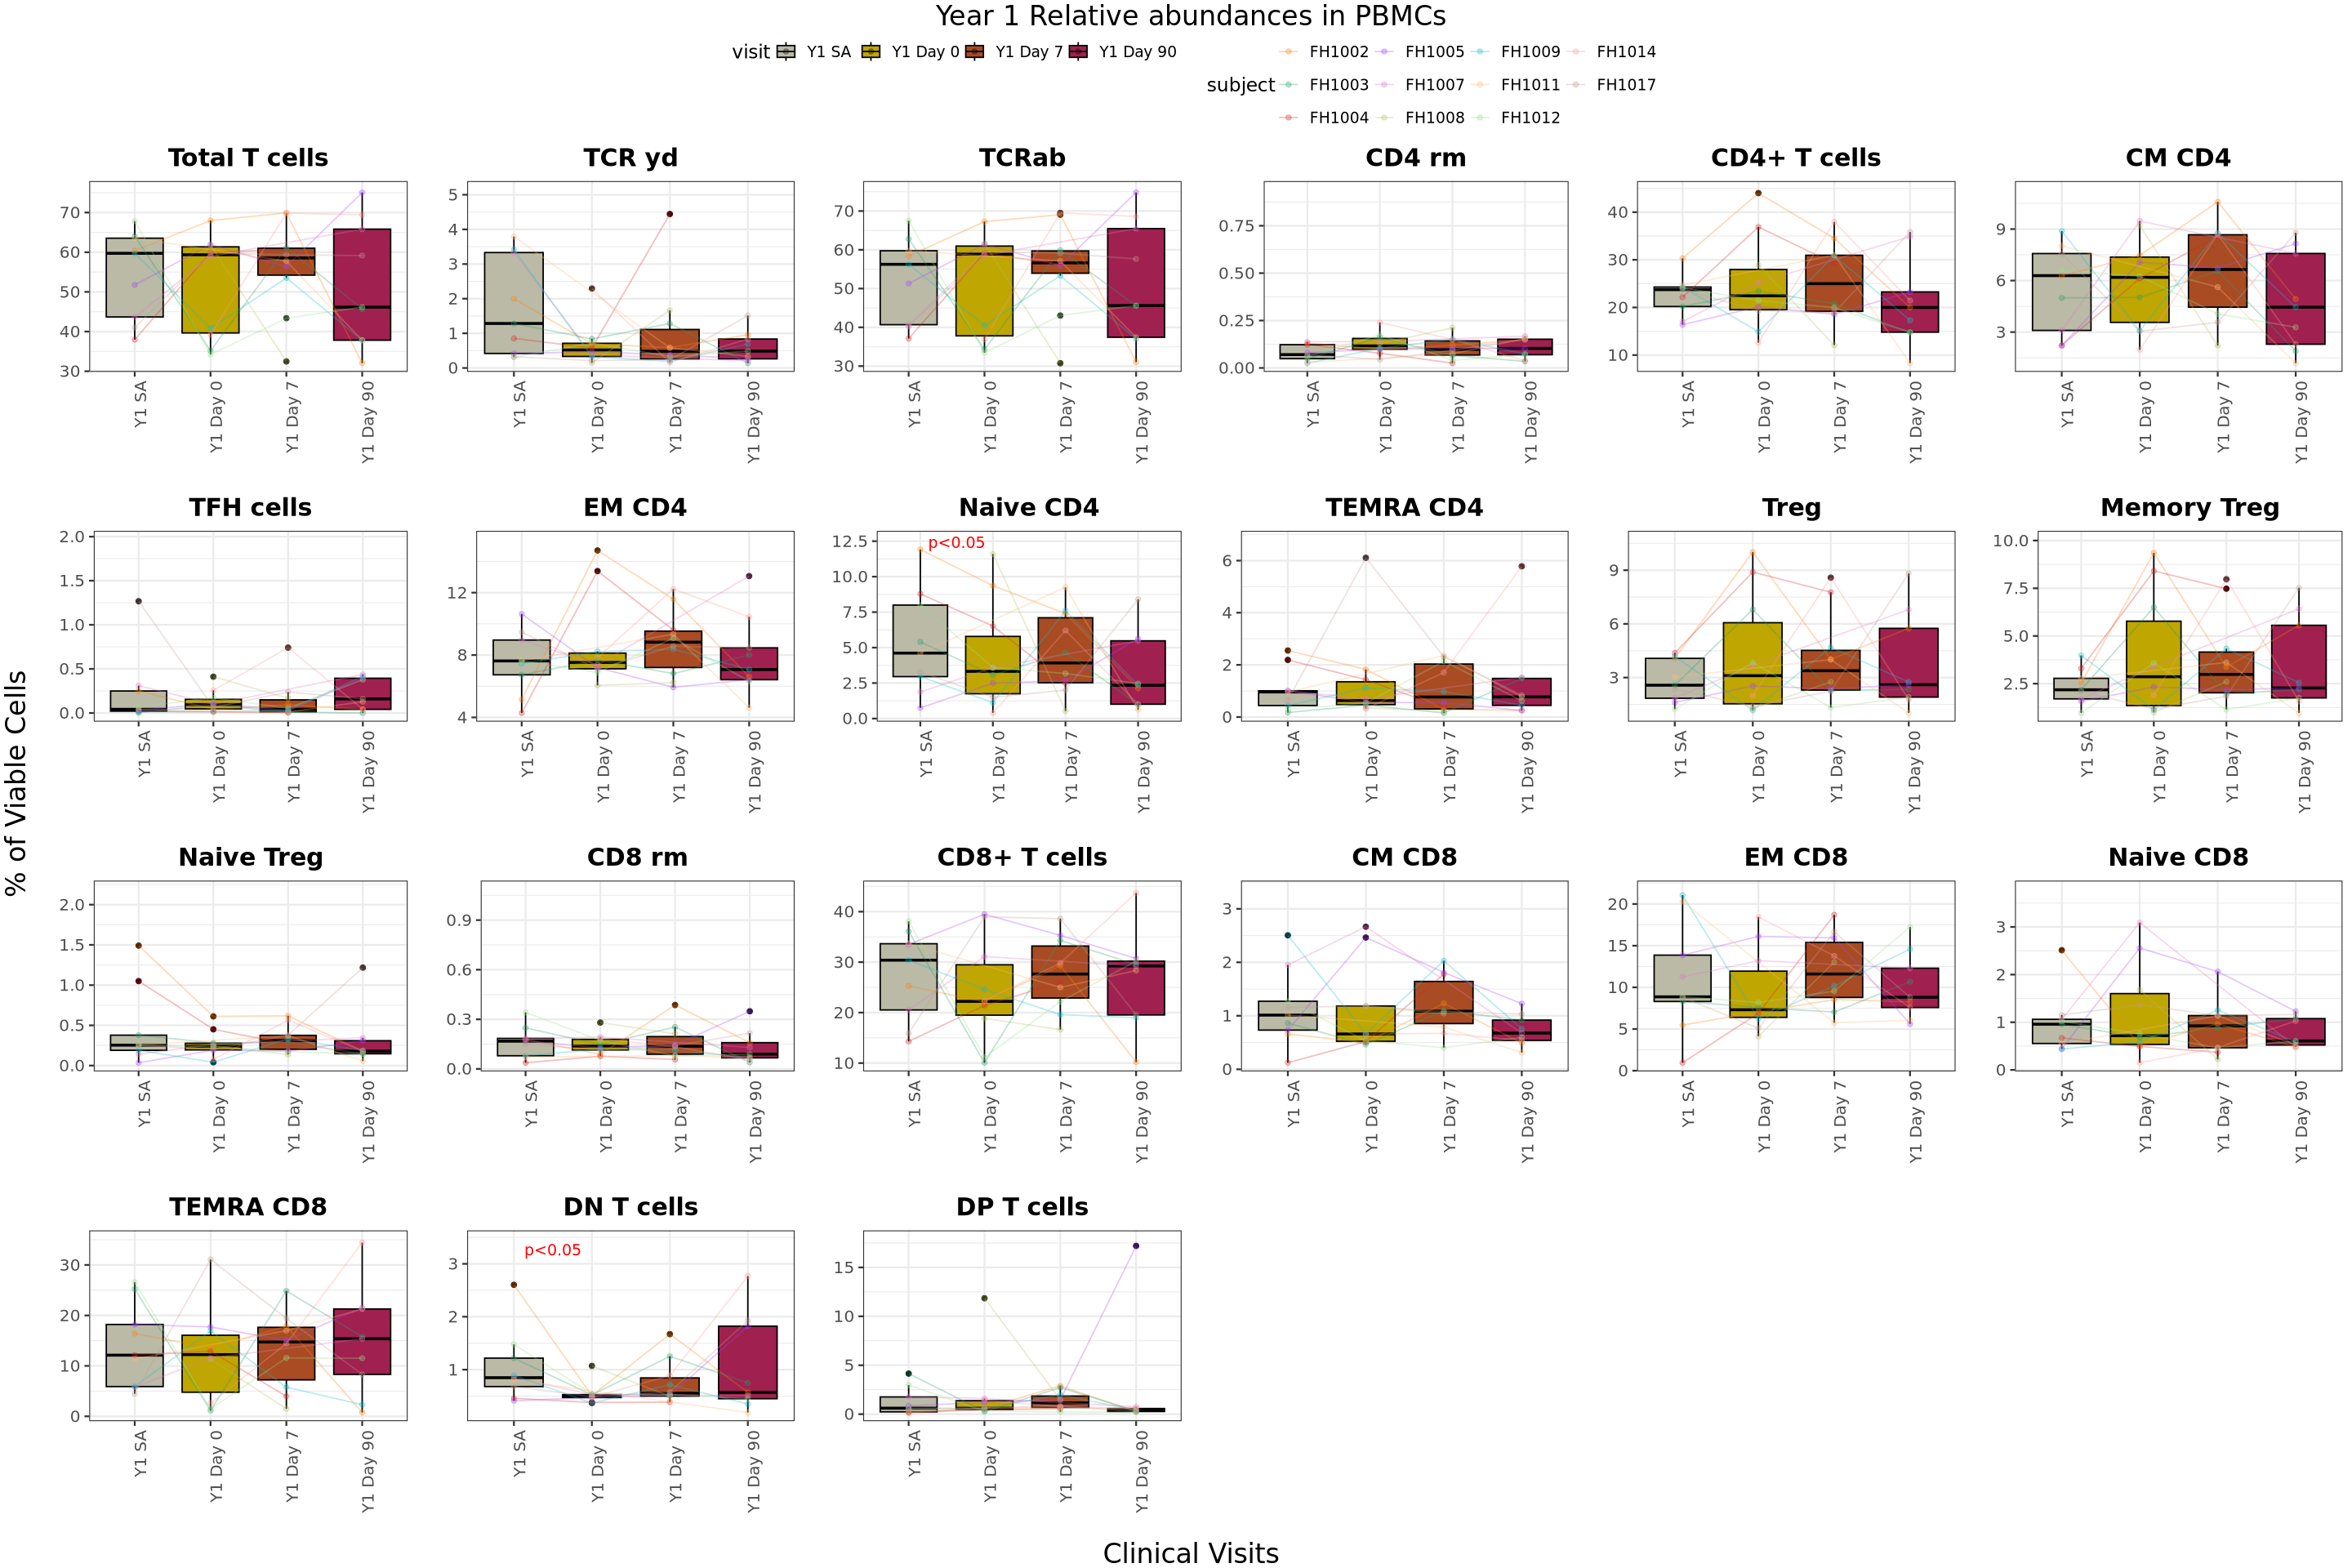

In [43]:
options(repr.plot.width = 24, repr.plot.height = 16)

home <- "/home/workspace/"
path <- "pbmc_flow/data/T Cell PBMC data_final_counts, % viable cells(in).csv"
df <- fread(file.path(home, path))

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

df <- df[df$percentOf == 'Viable Cells',]

df$subject <- df$Subject
df$visit <- df$Visit  
df$Cell <- df$population
df$cell_type_frac_total <- df$percent

df$visit <- timepoint_labels[df$visit]

df$visit <- factor(df$visit, levels = c("Y1 SA", "Y1 Day 0", "Y1 Day 7", "Y1 Day 90", 
                                        "Y2 SA", "Y2 Day 0", "Y2 Day 7", "Y2 Day 90"))

timepoints_pairs <- list(
    c('Y1 SA','Y1 Day 0'),
    c('Y1 Day 0','Y1 Day 7'),
    c('Y1 Day 7', 'Y1 Day 90')
)

plotlist <- lapply(unique(df$Cell), function(x){
    testCelltype_paired(df, x, pairsOfTimes = timepoints_pairs, size = 4)$Plot
})

fig <- ggpubr::ggarrange(plotlist = plotlist, common.legend = TRUE, ncol = 6, nrow = 4)
fig <- annotate_figure(fig,
                      top = text_grob('Year 1 Relative abundances in PBMCs', size = 20))

annotate_figure(fig,
               bottom = text_grob('Clinical Visits', size = 20),
               left = text_grob('% of Viable Cells', size = 20, rot = 90)
)

### Function for testing celltype between timepoints (averages duplicate timepoints for each subject/celltype combination)

In [30]:
testCelltype_paired <- function(Mat, celltype, pairsOfTimes, size=5) {
  cMat = Mat[Cell==celltype & visit %in% unique(unlist(pairsOfTimes))]
  
  cMat$Value = cMat$cell_type_frac_total
  
  # Get all consecutive time point pairs
  time_points <- levels(cMat$visit)
  
  pairsOfTimes = pairsOfTimes
  
  # Identify subjects with paired data for plotting
  subjects_with_pairs <- c()
  
  # Loop through consecutive time points
  pairwise_results <- data.frame(
    Time1 = character(),
    Time2 = character(),
    p_value = numeric(),
    stringsAsFactors = FALSE
  )
  for (i in 1:length(pairsOfTimes)) {
    # Subset data for the two consecutive time points
    pairwise_data <- subset(cMat, visit %in% pairsOfTimes[[i]])
    
    # FIX 1: Add fun.aggregate to handle duplicates
    pairwise_data = dcast(pairwise_data, subject ~ visit, value.var = 'Value', fun.aggregate = mean)
    pairwise_data = pairwise_data[ !is.na(pairwise_data[,2][[1]]) & 
                                     !is.na(pairwise_data[,3][[1]])]   
    
    subjects_with_pairs <- c(subjects_with_pairs, pairwise_data$subject)
    
    # FIX 2: Add exact=FALSE to suppress warnings
    test_result <- wilcox.test(
      pairwise_data[,2][[1]], 
      pairwise_data[,3][[1]],
      paired = TRUE,
      exact = FALSE
    )
    
    medDiff = median( pairwise_data[,2][[1]]-pairwise_data[,3][[1]])
    # Store the results
    pval =test_result$p.value
    pairwise_results <- rbind(pairwise_results, data.frame(
      Time1 = pairsOfTimes[[i]][1],
      Time2 = pairsOfTimes[[i]][2],
      pval = pval,
      p_value = ifelse(pval < 0.05,'p<0.05', ''),
      p_value2 = ifelse(pval < 0.05,'*',''),
      Time1Val = median(pairwise_data[,2][[1]]),
      Time2Val = median(pairwise_data[,3][[1]]),
      Log2FC = log2(median(pairwise_data[,3][[1]]) /median(pairwise_data[,2][[1]]))
    ))
  }
  
  # Filter cMat to only subjects with paired data
  cMat_plot <- cMat[subject %in% unique(subjects_with_pairs)]
  
  p <- ggplot(cMat_plot, aes(x = visit, y = Value)) +
    geom_boxplot(fill = "skyblue", color = "black") +geom_point(alpha=0.3)+
    geom_line(data=cMat_plot,
              aes(x=visit,
                  y=Value,
                  group=subject),
              alpha=0.3)+
    labs(title = celltype,
         x = "",
         y = "") +
    theme_minimal() +ylim(NA, max(cMat_plot$Value) + 0.7)+
    theme(text=element_text(size=14),
          axis.text.x = element_text(angle=90))
  
  for (i in 1:nrow(pairwise_results)) {
    p <- p + annotate(
      "text",
      x = i + 0.5,
      y = max(cMat_plot$Value) + 0.5,
      label = pairwise_results$p_value[i],
      size =size ,
      color = "red"
    )
  }
  pairwise_results$Celltype=celltype
  return(list(Res=pairwise_results,
              Plot =p))
}

### Year 2

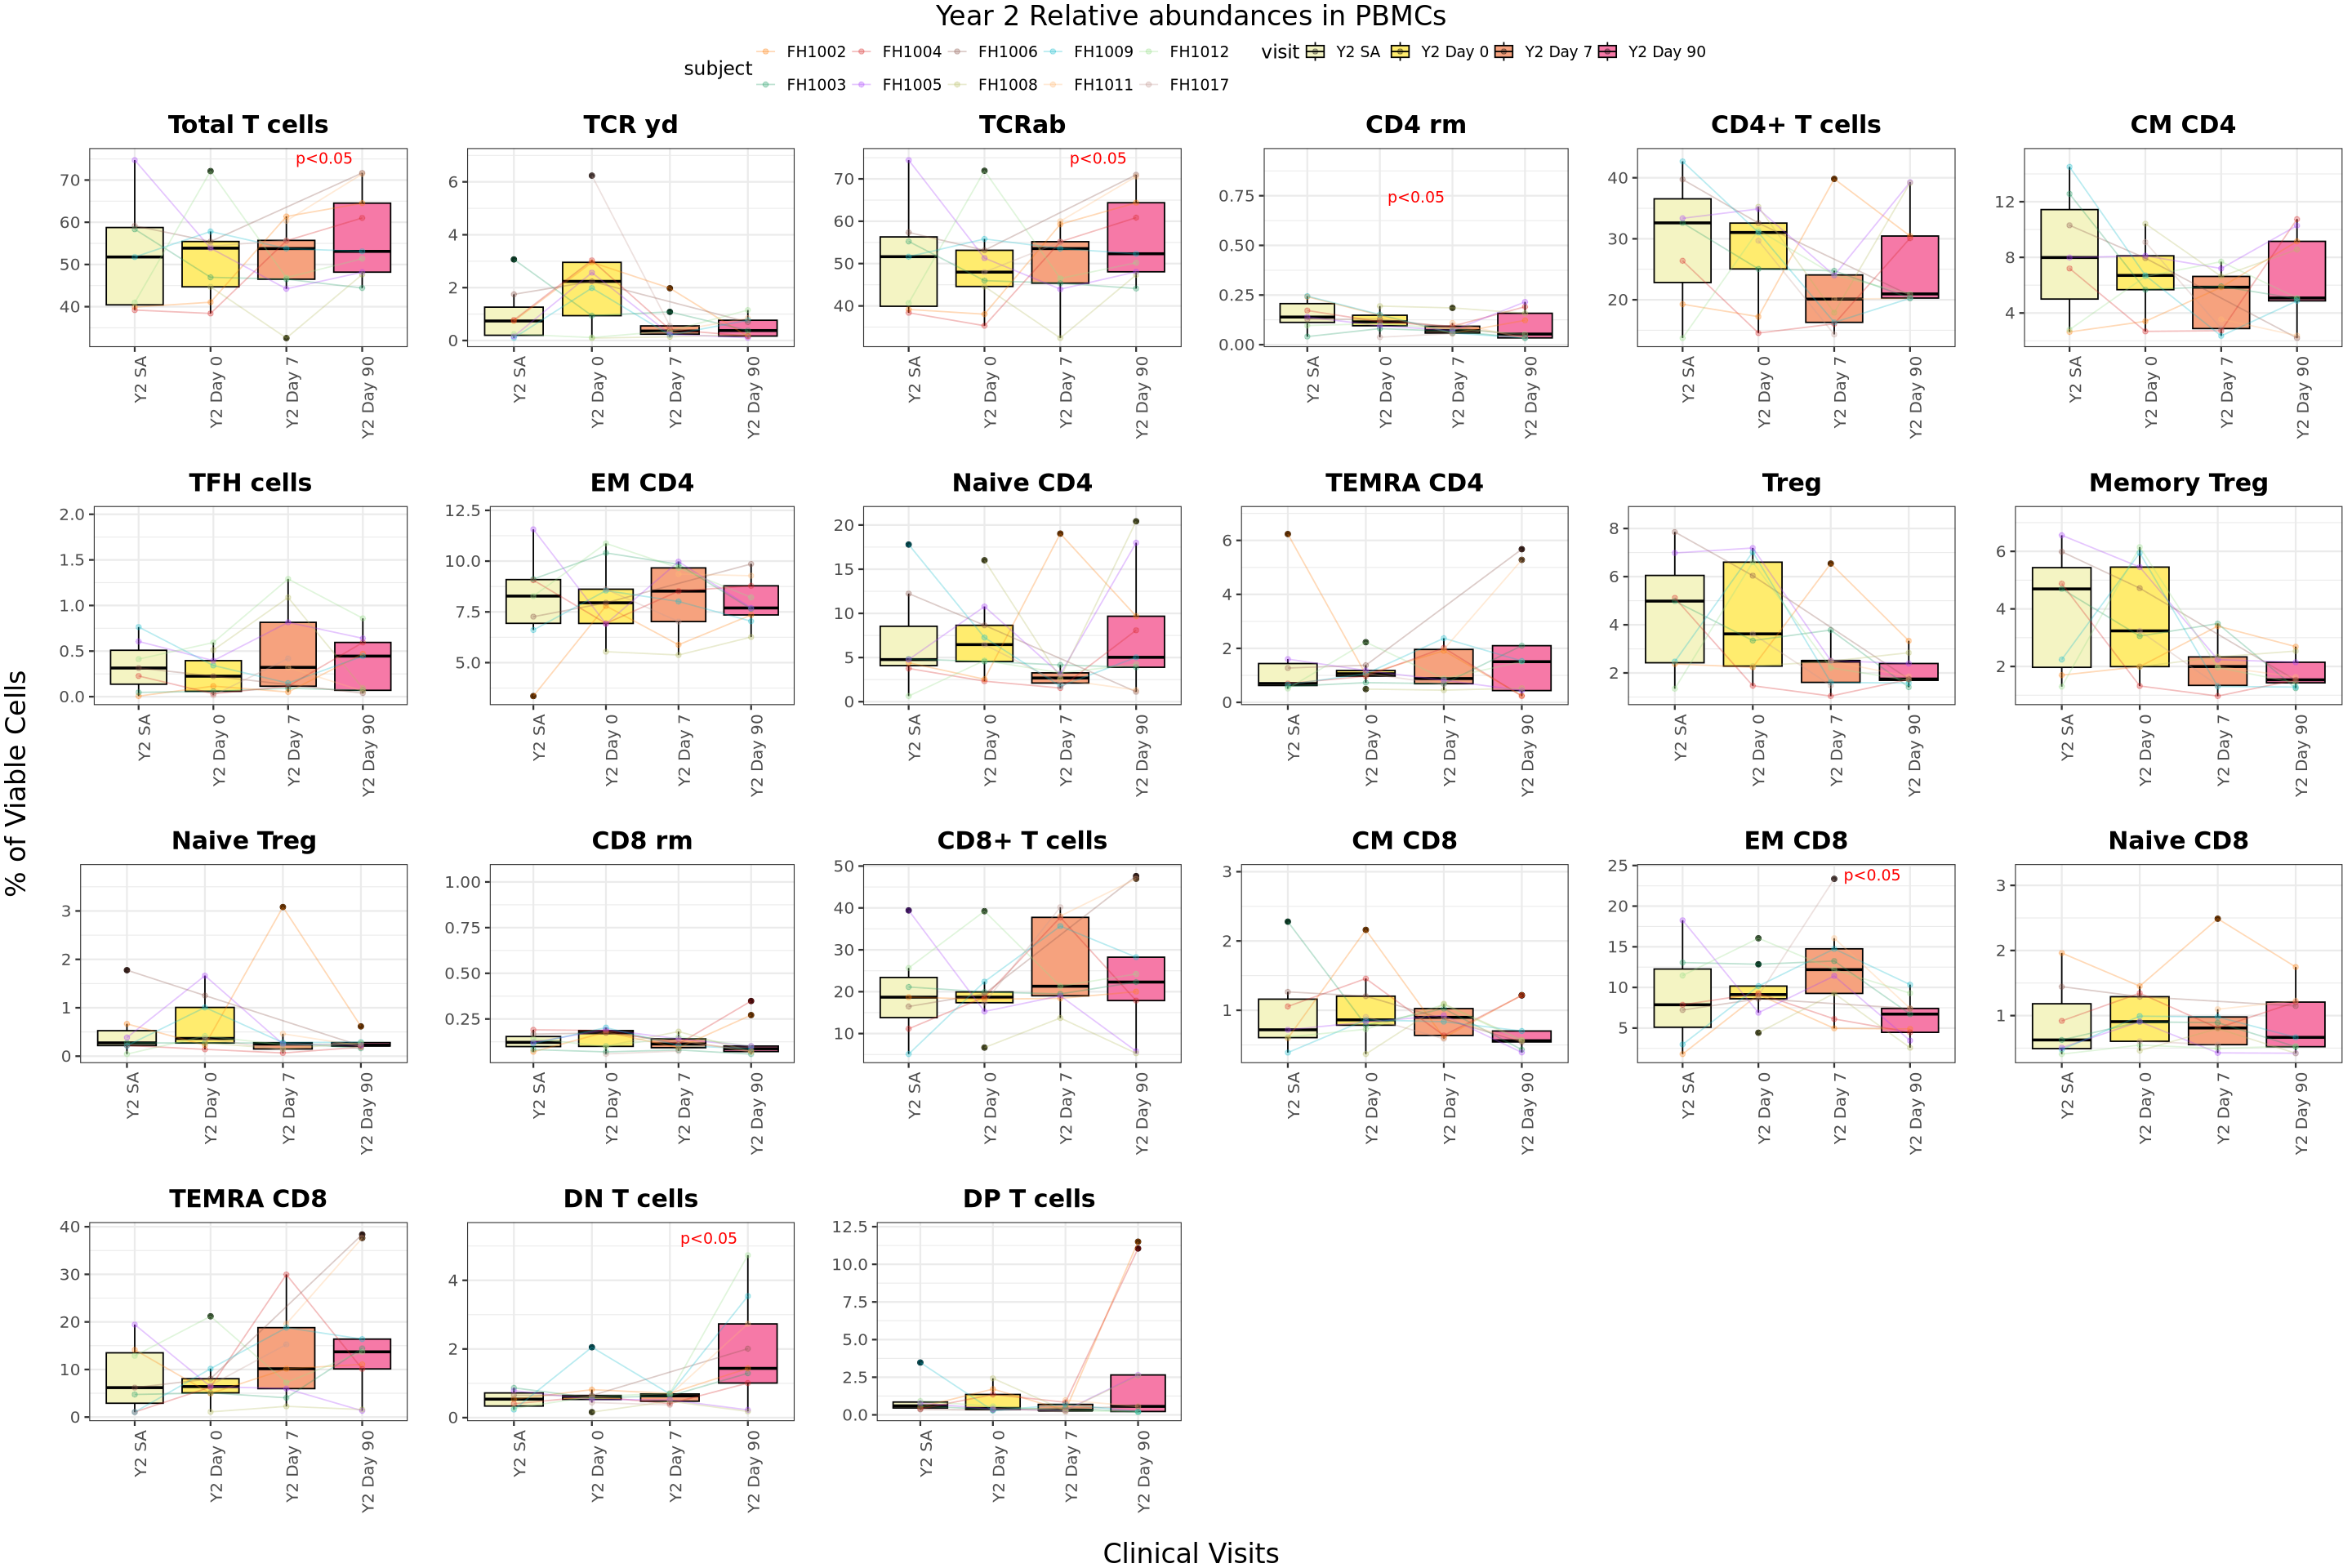

In [44]:
options(repr.plot.width = 24, repr.plot.height = 16)

home <- "/home/workspace/"
path <- "pbmc_flow/data/T Cell PBMC data_final_counts, % viable cells(in).csv"
df <- fread(file.path(home, path))

timepoint_labels <- c(
    "Flu Year 1 Stand-Alone" = "Y1 SA",
    "Flu Year 1 Day 0" = "Y1 Day 0", 
    "Flu Year 1 Day 7" = "Y1 Day 7",
    "Flu Year 1 Day 90" = "Y1 Day 90",
    "Flu Year 2 Stand-Alone" = "Y2 SA",
    "Flu Year 2 Day 0" = "Y2 Day 0",
    "Flu Year 2 Day 7" = "Y2 Day 7", 
    "Flu Year 2 Day 90" = "Y2 Day 90"
)

df <- df[df$percentOf == 'Viable Cells',]
df <- df[!(df$Subject == 'FH1008' & df$Visit == 'Flu Year 2 Stand-Alone'),]   # Excludes FH1008 Year 2 SA, due to duplicate dataset for all celltypes

df$subject <- df$Subject
df$visit <- df$Visit  
df$Cell <- df$population
df$cell_type_frac_total <- df$percent

df$visit <- timepoint_labels[df$visit]

df$visit <- factor(df$visit, levels = c("Y1 SA", "Y1 Day 0", "Y1 Day 7", "Y1 Day 90", 
                                        "Y2 SA", "Y2 Day 0", "Y2 Day 7", "Y2 Day 90"))

timepoints_pairs <- list(
    c('Y2 SA','Y2 Day 0'),
    c('Y2 Day 0','Y2 Day 7'),
    c('Y2 Day 7', 'Y2 Day 90')
)

plotlist <- lapply(unique(df$Cell), function(x){
    testCelltype_paired(df, x, pairsOfTimes = timepoints_pairs, size = 4)$Plot
})

fig <- ggpubr::ggarrange(plotlist = plotlist, common.legend = TRUE, ncol = 6, nrow = 4)
fig <- annotate_figure(fig,
                      top = text_grob('Year 2 Relative abundances in PBMCs', size = 20))

annotate_figure(fig,
               bottom = text_grob('Clinical Visits', size = 20),
               left = text_grob('% of Viable Cells', size = 20, rot = 90)
)